In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, pearsonr, f_oneway
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Data Cleaning

In [2]:
df = pd.read_csv(r"C:\Users\Aadesh Yogi\Desktop\Programming_training\PROJ\EDA Project\Raw Dataset.csv")

In [3]:
df

,Unnamed: 0,Property_Name,Location,Property_Type,Room_Type,Price,Rating,Reviews,Free_Cancellation
0,0,Ronnie's Studio Apartment,Arpora,Entire apartment,Apartment with Balcony,4749,6.9,203.0,No
1,1,Courtyard Di-Mar,Calangute,Private suite,Superior Suite,8000,8.9,88.0,Yes
2,2,Susegad Suites Goa Apartments & Villas with Re...,Arpora,Entire apartment,1BHK Apartment with Balcony,9750,9.2,133.0,Yes
3,3,Resort Paloma De Goa,Colva,Entire apartment,One-Bedroom Apartment,6363,6.6,138.0,No
4,4,EKOSTAY Luxe I Avante Villa,Calangute,Entire villa,Villa with Private Pool,49500,9.0,5.0,Yes
...,...,...,...,...,...,...,...,...,...
547,547,Poolside Apartment Bliss by the Pool Goa,Candolim,Entire apartment,One-Bedroom Apartment,8100,9.5,24.0,No
548,548,STARBURST By The Beach Goa,Benaulim,Entire studio,Superior Studio,8238,10.0,3.0,Yes
549,549,Casa Brooklyn Portuguese Heritage,Saligao,Entire villa,Villa with Garden View,7558,9.5,18.0,Yes
550,550,Calangute 3bhk Apartment Goa,Candolim,Entire apartment,Three-Bedroom Apartment,12869,NaN,NaN,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         552 non-null    int64  
 1   Property_Name      552 non-null    object 
 2   Location           552 non-null    object 
 3   Property_Type      552 non-null    object 
 4   Room_Type          552 non-null    object 
 5   Price              552 non-null    int64  
 6   Rating             487 non-null    float64
 7   Reviews            494 non-null    float64
 8   Free_Cancellation  552 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 38.9+ KB


In [5]:
df.shape

(552, 9)

In [6]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [7]:
df.head()

,Property_Name,Location,Property_Type,Room_Type,Price,Rating,Reviews,Free_Cancellation
0,Ronnie's Studio Apartment,Arpora,Entire apartment,Apartment with Balcony,4749,6.9,203.0,No
1,Courtyard Di-Mar,Calangute,Private suite,Superior Suite,8000,8.9,88.0,Yes
2,Susegad Suites Goa Apartments & Villas with Re...,Arpora,Entire apartment,1BHK Apartment with Balcony,9750,9.2,133.0,Yes
3,Resort Paloma De Goa,Colva,Entire apartment,One-Bedroom Apartment,6363,6.6,138.0,No
4,EKOSTAY Luxe I Avante Villa,Calangute,Entire villa,Villa with Private Pool,49500,9.0,5.0,Yes


In [8]:
df.tail()

,Property_Name,Location,Property_Type,Room_Type,Price,Rating,Reviews,Free_Cancellation
547,Poolside Apartment Bliss by the Pool Goa,Candolim,Entire apartment,One-Bedroom Apartment,8100,9.5,24.0,No
548,STARBURST By The Beach Goa,Benaulim,Entire studio,Superior Studio,8238,10.0,3.0,Yes
549,Casa Brooklyn Portuguese Heritage,Saligao,Entire villa,Villa with Garden View,7558,9.5,18.0,Yes
550,Calangute 3bhk Apartment Goa,Candolim,Entire apartment,Three-Bedroom Apartment,12869,NaN,NaN,Yes
551,Tien B&B & Bistro,Vagator,Entire villa,Villa,12000,9.4,22.0,Yes


In [9]:
df.isna().sum()

Property_Name         0
Location              0
Property_Type         0
Room_Type             0
Price                 0
Rating               65
Reviews              58
Free_Cancellation     0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Reviews'] = df['Reviews'].fillna(0).astype(int)

In [12]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean()).round(1)

In [13]:
df.isna().sum()

Property_Name        0
Location             0
Property_Type        0
Room_Type            0
Price                0
Rating               0
Reviews              0
Free_Cancellation    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property_Name      552 non-null    object 
 1   Location           552 non-null    object 
 2   Property_Type      552 non-null    object 
 3   Room_Type          552 non-null    object 
 4   Price              552 non-null    int64  
 5   Rating             552 non-null    float64
 6   Reviews            552 non-null    int64  
 7   Free_Cancellation  552 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 34.6+ KB


In [15]:
df.tail()

,Property_Name,Location,Property_Type,Room_Type,Price,Rating,Reviews,Free_Cancellation
547,Poolside Apartment Bliss by the Pool Goa,Candolim,Entire apartment,One-Bedroom Apartment,8100,9.5,24,No
548,STARBURST By The Beach Goa,Benaulim,Entire studio,Superior Studio,8238,10.0,3,Yes
549,Casa Brooklyn Portuguese Heritage,Saligao,Entire villa,Villa with Garden View,7558,9.5,18,Yes
550,Calangute 3bhk Apartment Goa,Candolim,Entire apartment,Three-Bedroom Apartment,12869,8.3,0,Yes
551,Tien B&B & Bistro,Vagator,Entire villa,Villa,12000,9.4,22,Yes


In [16]:
df.describe()

,Price,Rating,Reviews
count,552.000000,552.000000,552.000000
mean,20121.811594,8.333333,41.943841
std,26529.612778,1.495442,83.072261
min,1439.000000,1.000000,0.000000
25%,6108.500000,7.900000,2.000000
50%,9998.000000,8.500000,9.000000
75%,23296.500000,9.400000,36.000000
max,210899.000000,10.000000,571.000000


In [19]:
df.to_csv("Cleaned Dataset.csv", index=False)

In [20]:
df['Price_for_night'] = 2

In [21]:
df['Price_per_night'] = df['Price']/df['Price_for_night']

In [22]:
df.head()

,Property_Name,Location,Property_Type,Room_Type,Price,Rating,Reviews,Free_Cancellation,Price_for_night,Price_per_night
0,Ronnie's Studio Apartment,Arpora,Entire apartment,Apartment with Balcony,4749,6.9,203,No,2,2374.5
1,Courtyard Di-Mar,Calangute,Private suite,Superior Suite,8000,8.9,88,Yes,2,4000.0
2,Susegad Suites Goa Apartments & Villas with Re...,Arpora,Entire apartment,1BHK Apartment with Balcony,9750,9.2,133,Yes,2,4875.0
3,Resort Paloma De Goa,Colva,Entire apartment,One-Bedroom Apartment,6363,6.6,138,No,2,3181.5
4,EKOSTAY Luxe I Avante Villa,Calangute,Entire villa,Villa with Private Pool,49500,9.0,5,Yes,2,24750.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property_Name      552 non-null    object 
 1   Location           552 non-null    object 
 2   Property_Type      552 non-null    object 
 3   Room_Type          552 non-null    object 
 4   Price              552 non-null    int64  
 5   Rating             552 non-null    float64
 6   Reviews            552 non-null    int64  
 7   Free_Cancellation  552 non-null    object 
 8   Price_for_night    552 non-null    int64  
 9   Price_per_night    552 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 43.3+ KB


In [24]:
df

,Property_Name,Location,Property_Type,Room_Type,Price,Rating,Reviews,Free_Cancellation,Price_for_night,Price_per_night
0,Ronnie's Studio Apartment,Arpora,Entire apartment,Apartment with Balcony,4749,6.9,203,No,2,2374.5
1,Courtyard Di-Mar,Calangute,Private suite,Superior Suite,8000,8.9,88,Yes,2,4000.0
2,Susegad Suites Goa Apartments & Villas with Re...,Arpora,Entire apartment,1BHK Apartment with Balcony,9750,9.2,133,Yes,2,4875.0
3,Resort Paloma De Goa,Colva,Entire apartment,One-Bedroom Apartment,6363,6.6,138,No,2,3181.5
4,EKOSTAY Luxe I Avante Villa,Calangute,Entire villa,Villa with Private Pool,49500,9.0,5,Yes,2,24750.0
...,...,...,...,...,...,...,...,...,...,...
547,Poolside Apartment Bliss by the Pool Goa,Candolim,Entire apartment,One-Bedroom Apartment,8100,9.5,24,No,2,4050.0
548,STARBURST By The Beach Goa,Benaulim,Entire studio,Superior Studio,8238,10.0,3,Yes,2,4119.0
549,Casa Brooklyn Portuguese Heritage,Saligao,Entire villa,Villa with Garden View,7558,9.5,18,Yes,2,3779.0
550,Calangute 3bhk Apartment Goa,Candolim,Entire apartment,Three-Bedroom Apartment,12869,8.3,0,Yes,2,6434.5


# Hypothesis Testing

Bivariate: (Two variables: Categorical vs Numerical)

#### Research Question

Does offering free cancellation have an impact on customer ratings?

#### Hypotheses

H₀ (Null Hypothesis): Free cancellation has no effect on customer ratings.

H₁ (Alternative Hypothesis): Free cancellation has a significant effect on customer ratings.

#### Test Used
One-way ANOVA

In [25]:
from scipy.stats import f_oneway

rating_yes = df[df['Free_Cancellation'] == 'Yes']['Rating']
rating_no = df[df['Free_Cancellation'] == 'No']['Rating']

f_stat, p_value = f_oneway(rating_yes, rating_no)
print("p-value:", p_value)

p-value: 0.6828297598113617


#### Interpretation

The p-value is greater than 0.05, so free cancellation does not significantly affect customer ratings.

## Data Visualization

## UNIVARIATE ANALYSIS

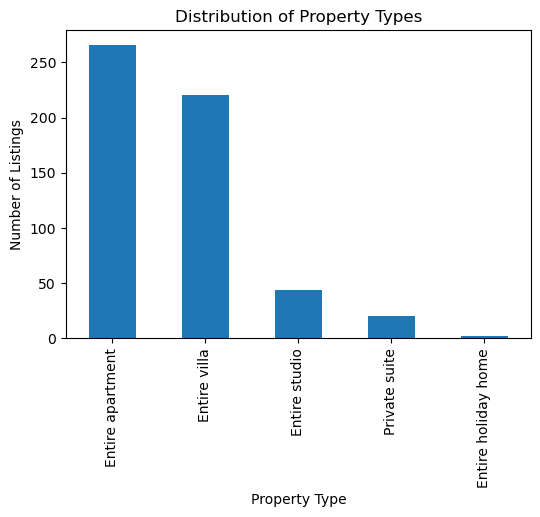

In [26]:
plt.figure(figsize=(6,4))

df['Property_Type'].value_counts().plot(kind='bar')

plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Number of Listings')

plt.show()


#### 2. Listings by Price Range (Bar Chart)

Indicates that the highest number of listings fall in the mid-price range, showing strong demand and competition.

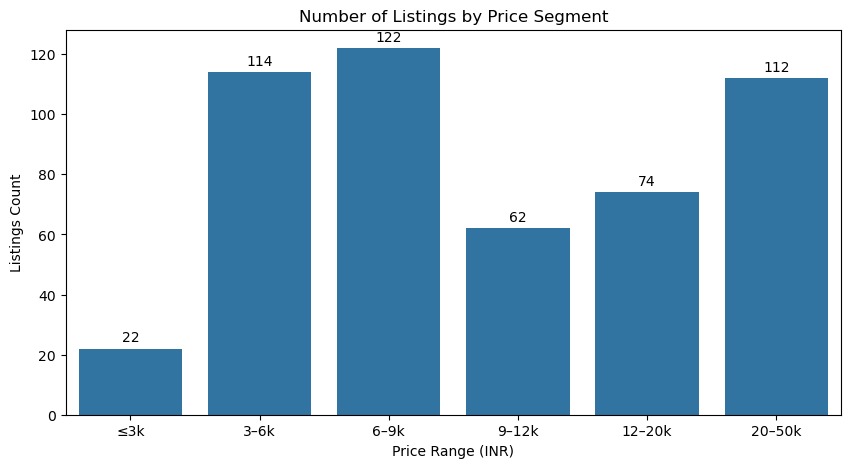

In [27]:
df["price_band"] = pd.cut(
    df["Price"],
    bins=[0, 3000, 6000, 9000, 12000, 20000, 50000],
    labels=["≤3k","3–6k","6–9k","9–12k","12–20k","20–50k"]
)

plt.figure(figsize=(10,5))
ax = sns.countplot(
    data=df,
    x="price_band"
)

plt.title("Number of Listings by Price Segment")
plt.xlabel("Price Range (INR)")
plt.ylabel("Listings Count")

for c in ax.containers:
    ax.bar_label(c, padding=3)

plt.show()


#### 3. Price Spread & Outliers (Box Plot)

Highlights wide price variation with high-priced outliers, indicating increased risk at premium pricing levels.

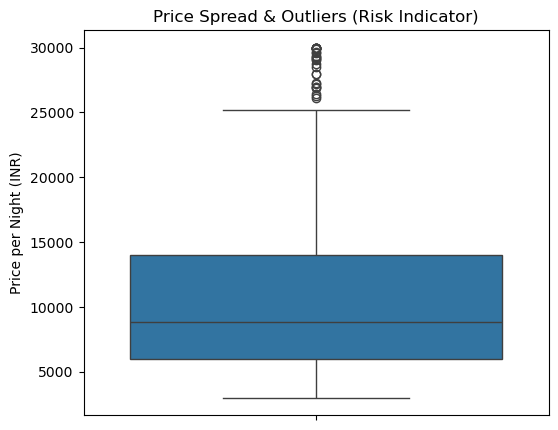

In [28]:
price_core_df = df[(df["Price"] >= 3000) & (df["Price"] <= 30000)]

plt.figure(figsize=(6,5))
sns.boxplot(
    data=price_core_df,
    y="Price"
)
plt.title("Price Spread & Outliers (Risk Indicator)")
plt.ylabel("Price per Night (INR)")
plt.show()


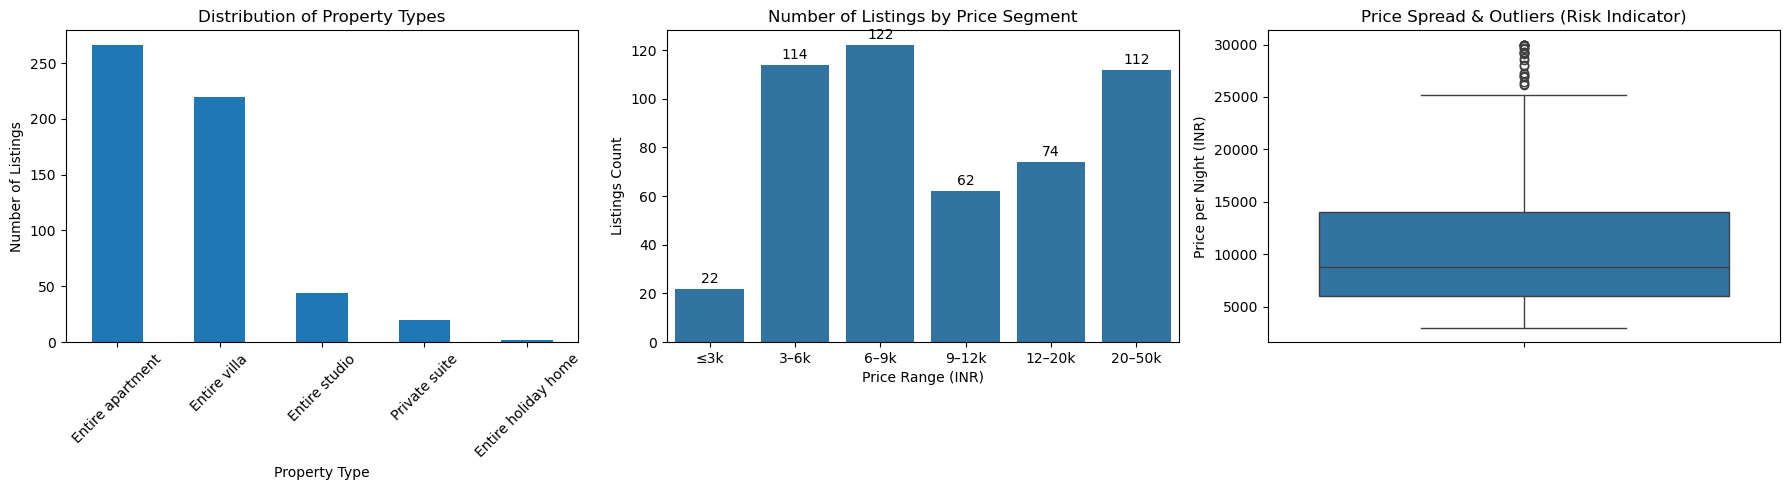

In [29]:
df["price_band"] = pd.cut(
    df["Price"],
    bins=[0, 3000, 6000, 9000, 12000, 20000, 50000],
    labels=["≤3k","3–6k","6–9k","9–12k","12–20k","20–50k"]
)

# -------------------------------
# IMPORTANT: Create SAME price subset as original
# (This keeps box around 5k–15k)
# -------------------------------
price_core_df = df[(df["Price"] >= 3000) & (df["Price"] <= 30000)]

# -------------------------------
# Combined Figure
# -------------------------------
plt.figure(figsize=(18,5))

# 1️⃣ Property Type Distribution
plt.subplot(1, 3, 1)
df["Property_Type"].value_counts().plot(kind="bar")
plt.title("Distribution of Property Types")
plt.xlabel("Property Type")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)

# 2️⃣ Listings by Price Segment
plt.subplot(1, 3, 2)
ax = sns.countplot(data=df, x="price_band")
plt.title("Number of Listings by Price Segment")
plt.xlabel("Price Range (INR)")
plt.ylabel("Listings Count")

for c in ax.containers:
    ax.bar_label(c, padding=2)

# 3️⃣ Price Spread & Outliers (EXACT ORIGINAL LOGIC)
plt.subplot(1, 3, 3)
sns.boxplot(data=price_core_df, y="Price")
plt.title("Price Spread & Outliers (Risk Indicator)")
plt.ylabel("Price per Night (INR)")

plt.tight_layout()
plt.show()

## BIVARIATE ANALYSIS

#### ️1. PRICE vs PROPERTY TYPE
Chart: Box Plot

Villas show higher and more variable prices, while apartments have more stable pricing.

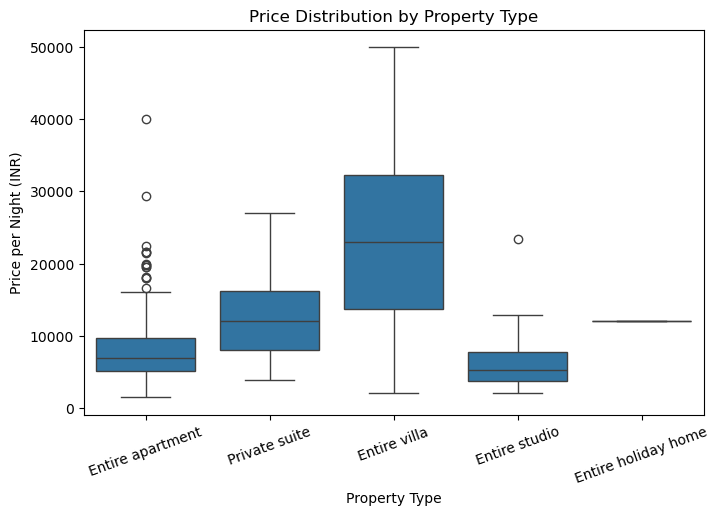

In [30]:
df1 = df[df["Price"] <= 50000]

plt.figure(figsize=(8,5))
sns.boxplot(
    data=df1,
    x="Property_Type",
    y="Price"
)
plt.title("Price Distribution by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Price per Night (INR)")
plt.xticks(rotation=20)
plt.show()


### 2.  PRICE vs FREE CANCELLATION
 Chart: Box Plot

Properties offering free cancellation are generally priced more competitively.

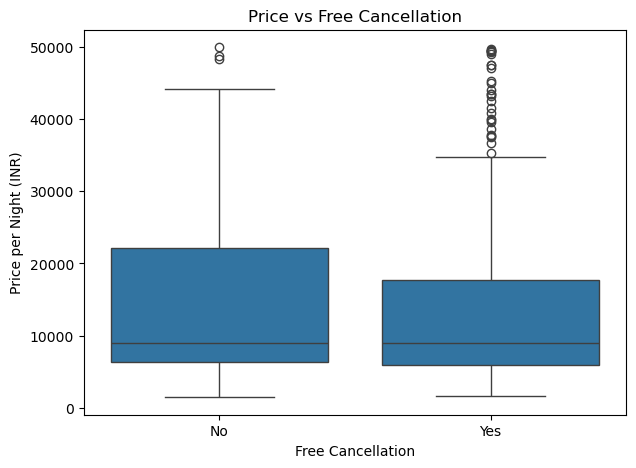

In [31]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df1,
    x="Free_Cancellation",
    y="Price"
)
plt.title("Price vs Free Cancellation")
plt.xlabel("Free Cancellation")
plt.ylabel("Price per Night (INR)")
plt.show()


### 3. REVIEWS vs PRICE RANGE
Chart: Bar Chart (Mean Reviews)

Mid-price ranges receive more reviews, indicating higher booking demand.

C:\Users\Aadesh Yogi\AppData\Local\Temp\ipykernel_3076\1972507550.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_reviews = df.groupby("price_band")["Reviews"].mean().reset_index()


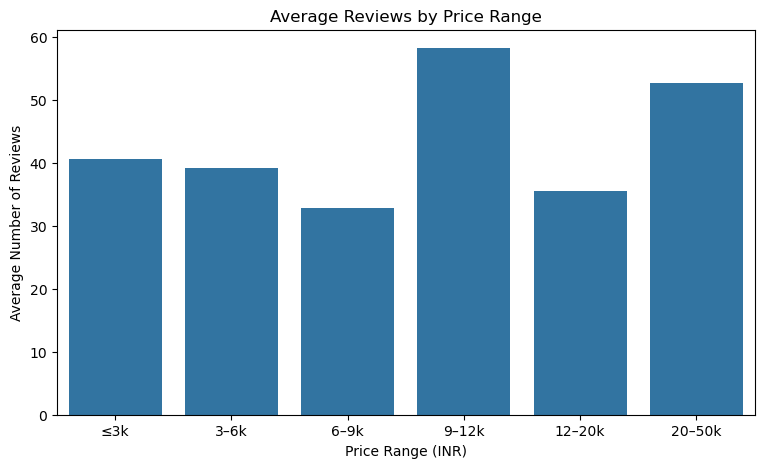

In [32]:
df["price_band"] = pd.cut(
    df["Price"],
    bins=[0, 3000, 6000, 9000, 12000, 20000, 50000],
    labels=["≤3k","3–6k","6–9k","9–12k","12–20k","20–50k"]
)

avg_reviews = df.groupby("price_band")["Reviews"].mean().reset_index()

plt.figure(figsize=(9,5))
sns.barplot(
    data=avg_reviews,
    x="price_band",
    y="Reviews"
)
plt.title("Average Reviews by Price Range")
plt.xlabel("Price Range (INR)")
plt.ylabel("Average Number of Reviews")
plt.show()


### ️4. PROPERTY TYPE vs FREE CANCELLATION
 Chart: Pie Chart

A larger share of listings offer free cancellation, showing customer-friendly policies.

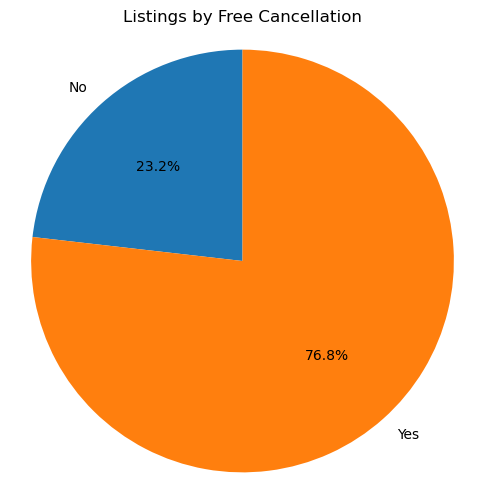

In [33]:
ptype_cancel = df.groupby("Free_Cancellation")["Property_Type"].count()

plt.figure(figsize=(6,6))
plt.pie(
    ptype_cancel,
    labels=ptype_cancel.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Listings by Free Cancellation")
plt.axis("equal")
plt.show()


C:\Users\Aadesh Yogi\AppData\Local\Temp\ipykernel_3076\1230974287.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_reviews = df.groupby("price_band")["Reviews"].mean().reset_index()


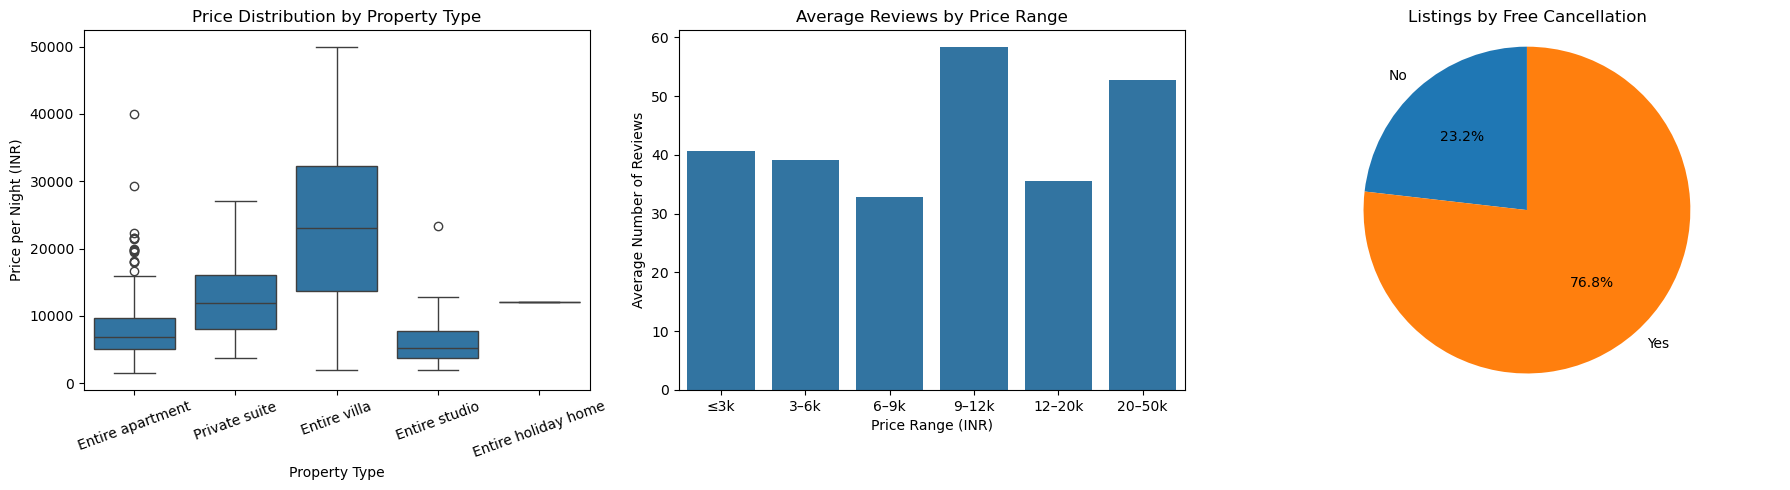

In [34]:
df1 = df[df["Price"] <= 50000]

df["price_band"] = pd.cut(
    df["Price"],
    bins=[0, 3000, 6000, 9000, 12000, 20000, 50000],
    labels=["≤3k","3–6k","6–9k","9–12k","12–20k","20–50k"]
)

avg_reviews = df.groupby("price_band")["Reviews"].mean().reset_index()
ptype_cancel = df.groupby("Free_Cancellation")["Property_Type"].count()

# -------------------------------
# Combined Figure
# -------------------------------
plt.figure(figsize=(18,5))

# 1️⃣ Price Distribution by Property Type
plt.subplot(1, 3, 1)
sns.boxplot(
    data=df1,
    x="Property_Type",
    y="Price"
)
plt.title("Price Distribution by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Price per Night (INR)")
plt.xticks(rotation=20)

# 2️⃣ Average Reviews by Price Range
plt.subplot(1, 3, 2)
sns.barplot(
    data=avg_reviews,
    x="price_band",
    y="Reviews"
)
plt.title("Average Reviews by Price Range")
plt.xlabel("Price Range (INR)")
plt.ylabel("Average Number of Reviews")

# 3️⃣ Listings by Free Cancellation
plt.subplot(1, 3, 3)
plt.pie(
    ptype_cancel,
    labels=ptype_cancel.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Listings by Free Cancellation")
plt.axis("equal")

plt.tight_layout()
plt.show()

## MULTIVARIATE DATA ANALYSIS

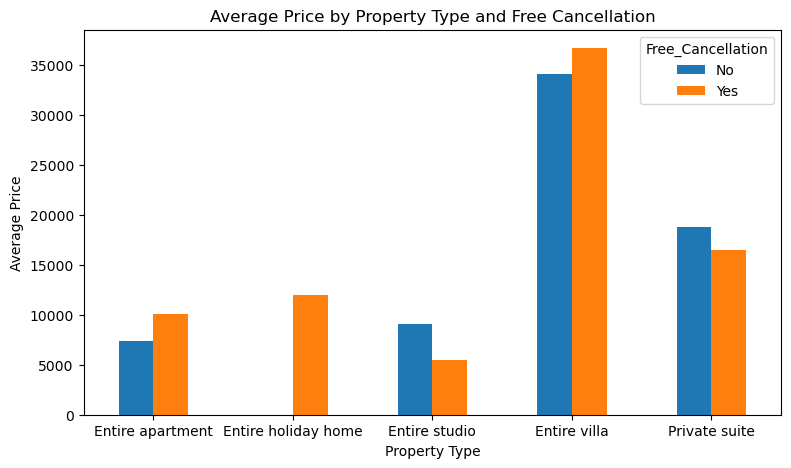

In [35]:
avg_price = df.groupby(['Property_Type', 'Free_Cancellation'])['Price'].mean().unstack()

avg_price.plot(kind='bar', figsize=(9,5))

plt.title('Average Price by Property Type and Free Cancellation')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)

plt.show()


#### 1. CORRELATION HEATMAP (Pure numeric, zero clutter)
Price ↔ Rating → weak relation

Reviews ↔ Rating → positive relation

Popular listings = better satisfaction
-- Description

Correlation heatmaps are ideal multivariate tools for large numeric datasets.

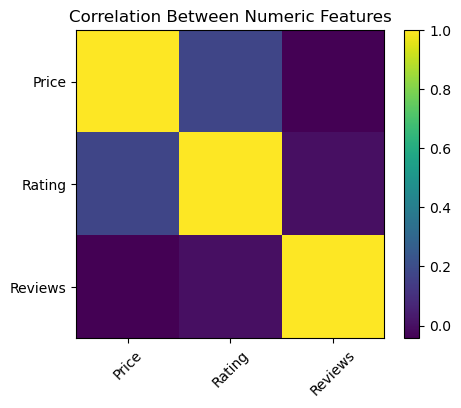

In [36]:
numeric_df = df[['Price', 'Rating', 'Reviews']]
corr = numeric_df.corr()

plt.figure(figsize=(5,4))
plt.imshow(corr)
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Between Numeric Features')
plt.show()


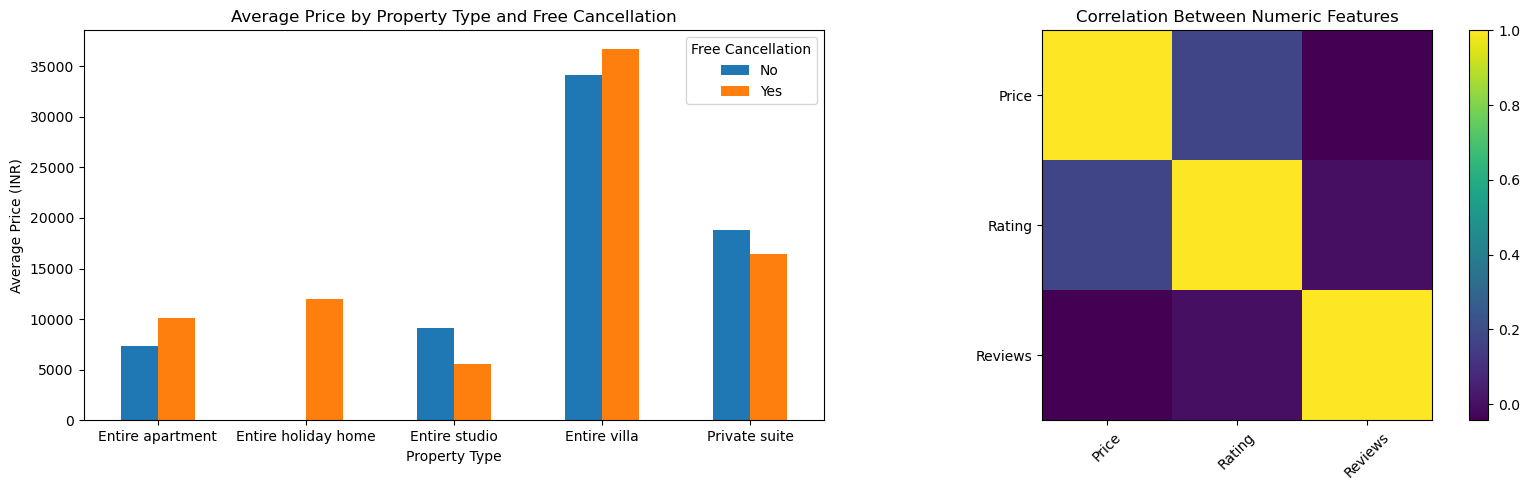

In [37]:
# 1️⃣ Average Price by Property Type & Free Cancellation
# -------------------------------
avg_price = df.groupby(
    ['Property_Type', 'Free_Cancellation']
)['Price'].mean().unstack()

# -------------------------------
# 2️⃣ Correlation Matrix
# -------------------------------
numeric_df = df[['Price', 'Rating', 'Reviews']]
corr = numeric_df.corr()

# -------------------------------
# Combined Figure
# -------------------------------
plt.figure(figsize=(16,5))

# Plot 1: Grouped Bar Chart
plt.subplot(1, 2, 1)
avg_price.plot(kind='bar', ax=plt.gca())
plt.title('Average Price by Property Type and Free Cancellation')
plt.xlabel('Property Type')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=0)
plt.legend(title='Free Cancellation')

# Plot 2: Correlation Heatmap (matplotlib only)
plt.subplot(1, 2, 2)
plt.imshow(corr)
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Between Numeric Features')

plt.tight_layout()
plt.show()